# 如何创建蜡烛图

蜡烛图在金融领域的应用非常广泛，蜡烛图包含了证券价格的开盘价，最高价，最低价，收盘价和成交量，是技术分析的基础。

参考：

* [用mplfinance,plotly,bokeh创建蜡烛图](https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh#1)
* [mplfinance官方文档](https://github.com/matplotlib/mplfinance#usage)

创建蜡烛图需要先安装一个三方库：mplfinance，这原本是Matplotlib的子模块，现被剥离成为一个独立的库。

在终端运行命令：**pip install mplfinance**

In [3]:
import os

import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

%matplotlib inline

## 1. 获取K线数据

先从蜂鸟数据获取股票历史K线，蜂鸟数据提供沪深A股，港股，美股，期货，外汇，数字货币的实时报价和历史数据。查看[API文档](https://trochil.github.io/apidocs/#5ea2e0cde2)。

登录[蜂鸟官网](http://trochil.cn/)，注册即可获得API密钥，免费获取金融数据。

In [4]:
# 获取微软(MSFT)的日图历史K线
data = requests.get('https://api.trochil.cn/v1/usstock/history',
                    params={
                        'symbol': 'MSFT',
                        'start_date': '2020-01-01',
                        'end_date': '2020-08-31',
                        'apikey': os.getenv("TROCHIL_API")  # 使用您的API密钥
                    })

df = pd.DataFrame.from_records(data.json()["data"])
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

df.head()

,open,high,low,close,volume
datetime,,,,,
2020-01-02,158.78,160.730,158.3300,160.62,22634546.0
2020-01-03,158.32,159.945,158.0600,158.62,21121681.0
2020-01-06,157.08,159.100,156.5100,159.03,20826702.0
2020-01-07,159.32,159.670,157.3200,157.58,21881740.0
2020-01-08,158.93,160.800,157.9491,160.09,27762026.0


## 2. 基础蜡烛图

要创建蜡烛图，只需要调用mpf.plot接口。

**mpf.plot(data, type, title, ylabel, style, volume, ylabel_lower, show_nontrading, figratio, mav)**

* data: pd.DataFrame, 包含'Open','High','Low','Close'字段，如果要显示成交量，还要提供'Volume'，默认时间序列索引(DatetimeIndex)
* type: 图表类型，可选值包含：'ohlc', 'candle', 'line', 'renko', 'pnf'
* title: 标题
* ylabel: 纵轴标签
* style: 蜡烛图样式，mplfinance提供了很多内置样式
* volume: True表示添加成交量，默认False
* ylabel_lower: 成交量的Y轴标签
* show_nontrading: True显示非交易日，默认False
* figratio: 控制图表大小的元组
* mav: 整数或包含整数的元组，是否在图表中添加移动平均线

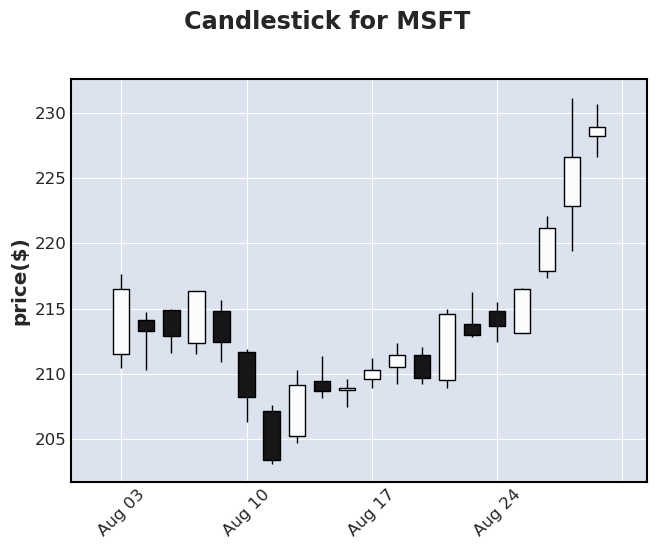

In [5]:
df2 = df["2020-08"]

mpf.plot(df2, type="candle", title="Candlestick for MSFT", ylabel="price($)")

## 3. 调整样式

mplfinance提供了很多内置样式，便于用户快速创建美观的蜡烛图。

In [6]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

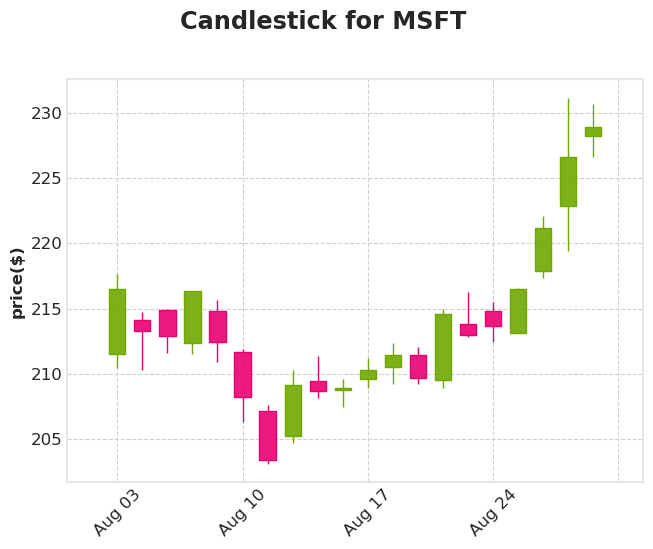

In [7]:
mpf.plot(df2, type="candle", title="Candlestick for MSFT", ylabel="price($)", style="binance")

## 4. 添加成交量

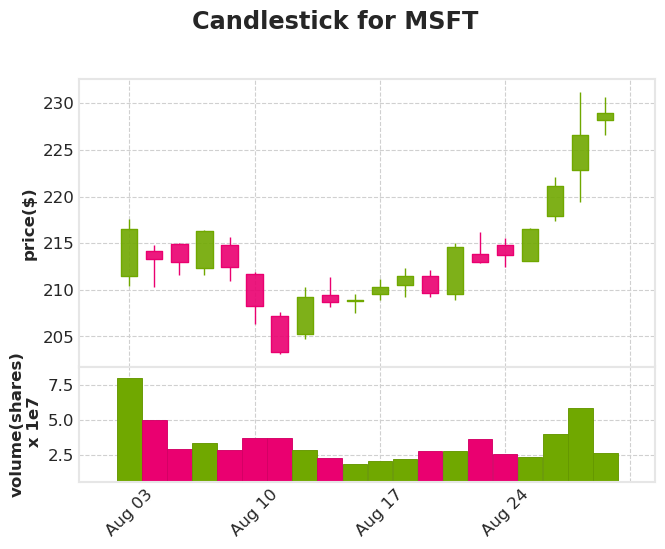

In [8]:
mpf.plot(
    data=df2,
    type="candle",
    title="Candlestick for MSFT",
    ylabel="price($)",
    style="binance",
    volume=True,
    ylabel_lower="volume(shares)"
)

## 5. 显示非交易日

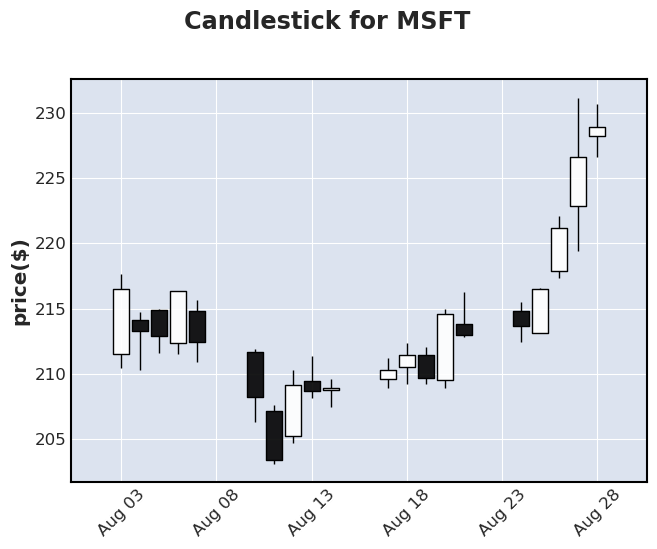

In [10]:
mpf.plot(
    data=df2,
    type="candle",
    title="Candlestick for MSFT",
    ylabel="price($)",
    show_nontrading=True
)

## 6. 自定义样式

如果内置样式不满足需求，可以自定义样式，并提供给style参数。

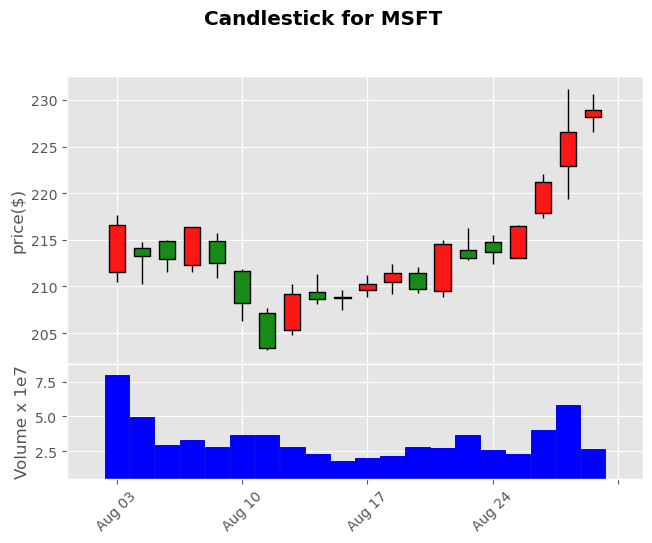

In [14]:
# 调用make_marketcolors函数，定义K线颜色
mc = mpf.make_marketcolors(
    up="red",  # 上涨K线的颜色
    down="green",  # 下跌K线的颜色
    edge="black",  # 蜡烛图箱体的颜色
    volume="blue",  # 成交量柱子的颜色
    wick="black"  # 蜡烛图影线的颜色
)

# 调用make_mpf_style函数，自定义图表样式
# 函数返回一个字典，查看字典包含的数据，按照需求和规范调整参数
style = mpf.make_mpf_style(base_mpl_style="ggplot", marketcolors=mc)
# print(style)

mpf.plot(
    data=df2,
    type="candle",
    title="Candlestick for MSFT",
    ylabel="price($)",
    style=style,
    volume=True
)

## 7. 调整图表大小

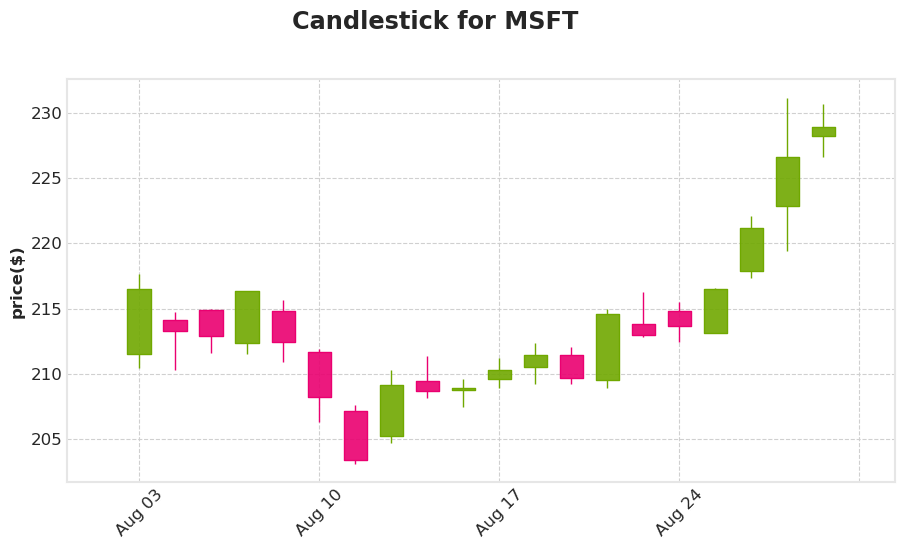

In [18]:
mpf.plot(
    data=df2,
    type="candle",
    title="Candlestick for MSFT",
    ylabel="price($)",
    style="binance",
    figratio=(12, 6)
)

## 8. 添加移动平均线

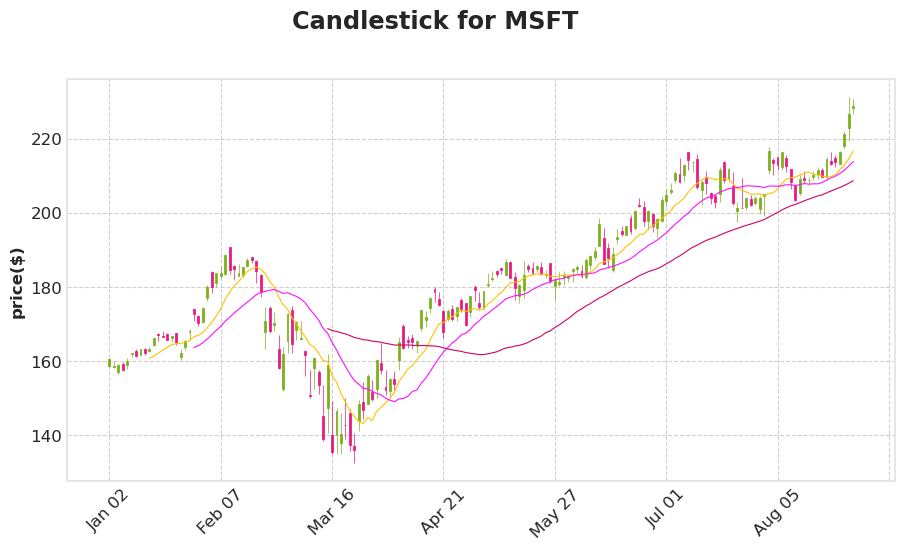

In [19]:
mpf.plot(
    data=df,
    type="candle",
    title="Candlestick for MSFT",
    ylabel="price($)",
    style="binance",
    figratio=(12, 6),
    mav=(10, 20, 50)  # 整数，或包含整数的列表/元组
)